In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Carseats.csv")

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
X_urban = df.drop(columns=["Urban", "US"])  # Fitur (tanpa Urban dan US)
y_urban = df["Urban"]  # Label untuk Urban

X_us = df.drop(columns=["Urban", "US"])  # Fitur (tanpa Urban dan US)
y_us = df["US"]  # Label untuk US

In [5]:
X_urban_encoded = pd.get_dummies(X_urban, drop_first=True).values
X_us_encoded = pd.get_dummies(X_us, drop_first=True).values

In [14]:
indices_urban = np.arange(len(X_urban_encoded))
np.random.seed(42)  # Untuk konsistensi hasil
np.random.shuffle(indices_urban)
split_urban = int(0.9 * len(X_urban_encoded))


X_urban_train, X_urban_test = X_urban_encoded[indices_urban[:split_urban]], X_urban_encoded[indices_urban[split_urban:]]
y_urban_train, y_urban_test = y_urban.iloc[indices_urban[:split_urban]], y_urban.iloc[indices_urban[split_urban:]]


In [15]:
indices_us = np.arange(len(X_us_encoded))
np.random.seed(42)
np.random.shuffle(indices_us)
split_us = int(0.9 * len(X_us_encoded))

X_us_train, X_us_test = X_us_encoded[indices_us[:split_us]], X_us_encoded[indices_us[split_us:]]
y_us_train, y_us_test = y_us.iloc[indices_us[:split_us]], y_us.iloc[indices_us[split_us:]]


In [16]:
model_urban = DecisionTreeClassifier(criterion="entropy", random_state=42)
model_urban.fit(X_urban_train, y_urban_train)
model_us = DecisionTreeClassifier(criterion="entropy", random_state=42)
model_us.fit(X_us_train, y_us_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [17]:
y_urban_pred = model_urban.predict(X_urban_test)
y_us_pred = model_us.predict(X_us_test)


In [18]:
print("Prediksi Urban")
print("Akurasi Model:", accuracy_score(y_urban_test, y_urban_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_urban_test, y_urban_pred))

print("\nLabel Sebenarnya (Urban):", list(y_urban_test.values))
print("Hasil Prediksi (Urban):", list(y_urban_pred))

Prediksi Urban
Akurasi Model: 0.6

Laporan Klasifikasi:
              precision    recall  f1-score   support

          No       0.40      0.29      0.33        14
         Yes       0.67      0.77      0.71        26

    accuracy                           0.60        40
   macro avg       0.53      0.53      0.52        40
weighted avg       0.57      0.60      0.58        40


Label Sebenarnya (Urban): ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No']
Hasil Prediksi (Urban): ['No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes']


In [19]:
print("\nPrediksi US")
print("Akurasi Model:", accuracy_score(y_us_test, y_us_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_us_test, y_us_pred))

print("\nLabel Sebenarnya (US):", list(y_us_test.values))
print("Hasil Prediksi (US):", list(y_us_pred))


Prediksi US
Akurasi Model: 0.9

Laporan Klasifikasi:
              precision    recall  f1-score   support

          No       0.85      0.85      0.85        13
         Yes       0.93      0.93      0.93        27

    accuracy                           0.90        40
   macro avg       0.89      0.89      0.89        40
weighted avg       0.90      0.90      0.90        40


Label Sebenarnya (US): ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No']
Hasil Prediksi (US): ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No']


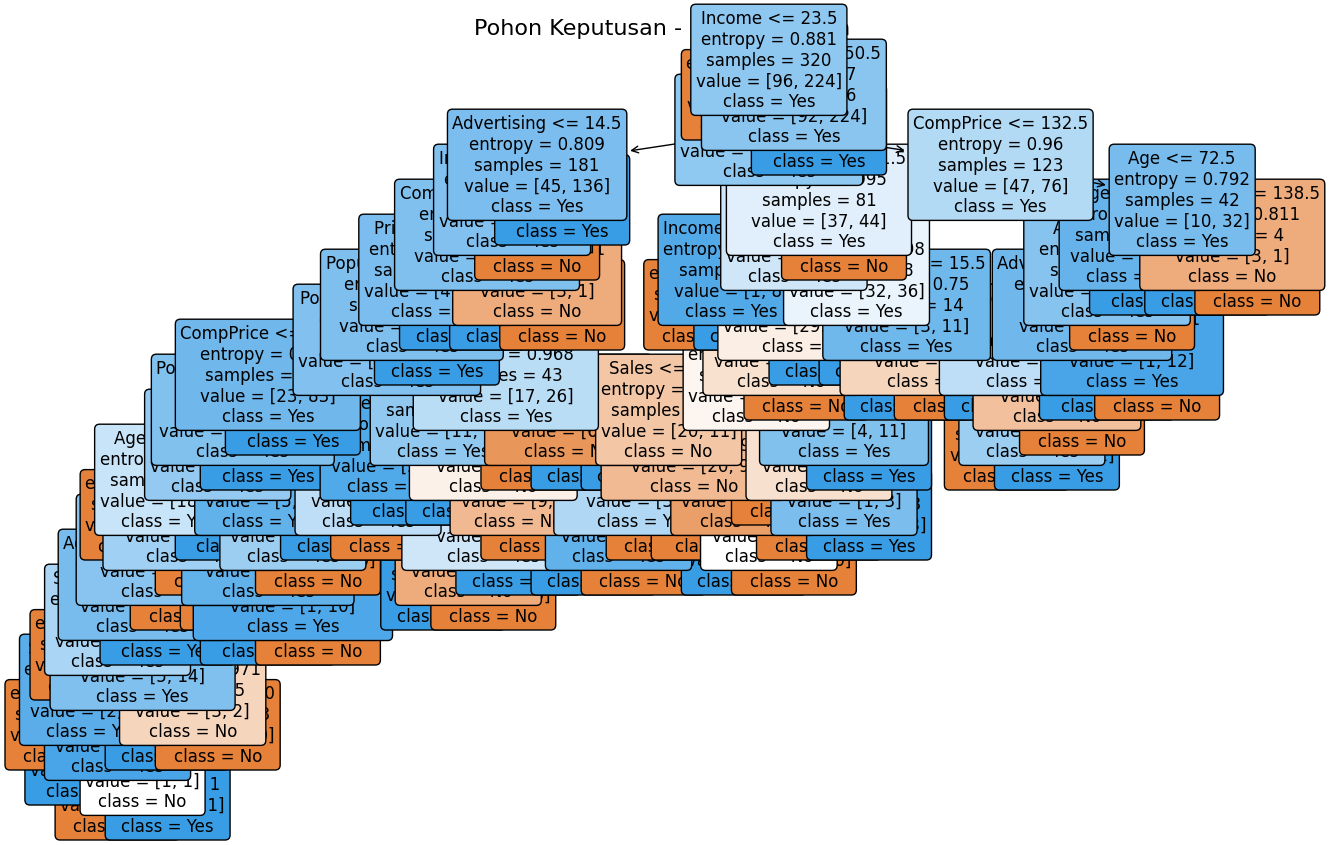

In [12]:
plt.figure(figsize=(16, 10))
plot_tree(
    model_urban,
    feature_names=pd.get_dummies(X_urban).columns,
    class_names=model_urban.classes_,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Pohon Keputusan - Prediksi Urban", fontsize=16)
plt.show()


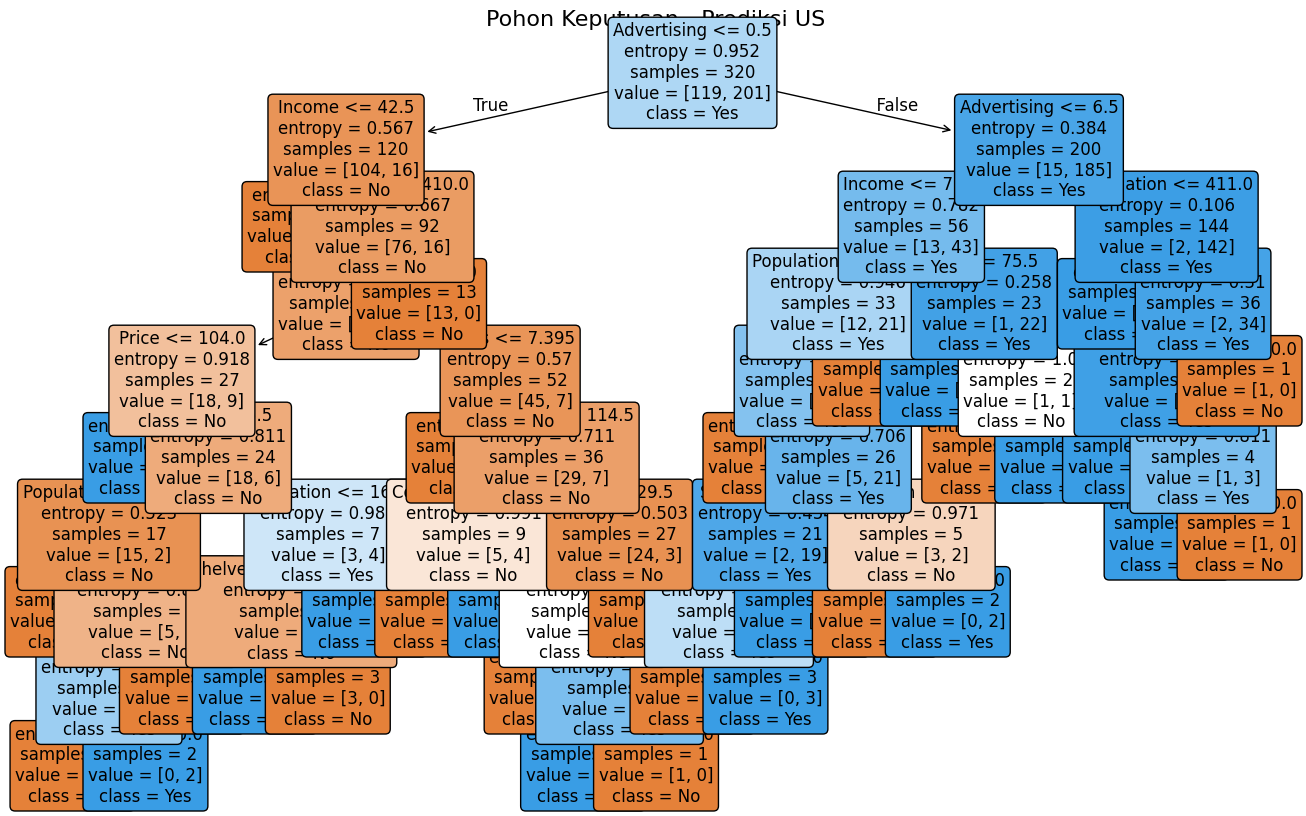

In [13]:
plt.figure(figsize=(16, 10))
plot_tree(
    model_us,
    feature_names=pd.get_dummies(X_us).columns,
    class_names=model_us.classes_,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Pohon Keputusan - Prediksi US", fontsize=16)
plt.show()